In [0]:
from vision import dataloaders
from vision.utils import Helper
from vision.models.resnet import ResNet18
from vision.imagetransforms import TorchTransforms,  album_transforms
import torch
from torchvision import  transforms

In [0]:
helper = Helper()

In [12]:
mean, std = helper.get_mean_and_std('cifar10')

Files already downloaded and verified


In [0]:
test_transforms = [ transforms.ToTensor(),
                    transforms.Normalize(mean, std)
                  ]

In [0]:
torch_transforms = TorchTransforms(test_transforms)

In [15]:
aub = album_transforms()

Files already downloaded and verified


In [0]:
train_transforms = aub
test_transforms = torch_transforms.testTransform()
loader = dataloaders.Loader(train_transforms, test_transforms, 'cifar10')


In [17]:
train_dataloader  = loader.dataloader_train()
test_dataloader = loader.dataloader_test()

Files already downloaded and verified
Files already downloaded and verified


In [0]:
Net = ResNet18()

In [19]:
size =  (3, 32, 32)
helper.model_summary(Net, size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [20]:
import torch.optim as optim
import torch.nn as nn
from vision.train_test_model import RunModel
from torch.optim.lr_scheduler import OneCycleLR

epochs = 25
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net.parameters(), lr=0.001, momentum=0.9)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(train_dataloader), epochs=epochs)
run = RunModel(Net, train_dataloader, test_dataloader, criterion, optimizer, scheduler, epochs)
run.train_test()

Epoch: 1  Loss=1.7756887674331665  Batch_id=1562  Train Accuracy=46.89: 100%|██████████| 1563/1563 [01:02<00:00, 25.15it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 59.68 % 



Epoch: 2  Loss=1.5350792407989502  Batch_id=1562  Train Accuracy=65.69: 100%|██████████| 1563/1563 [01:04<00:00, 24.21it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 70.60 % 



Epoch: 3  Loss=1.346396565437317  Batch_id=1562  Train Accuracy=73.30: 100%|██████████| 1563/1563 [01:03<00:00, 24.50it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 75.62 % 



Epoch: 4  Loss=0.9959180355072021  Batch_id=1562  Train Accuracy=78.47: 100%|██████████| 1563/1563 [01:03<00:00, 24.45it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.51 % 



Epoch: 5  Loss=0.6056965589523315  Batch_id=1562  Train Accuracy=81.74: 100%|██████████| 1563/1563 [01:03<00:00, 24.42it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.71 % 



Epoch: 6  Loss=0.5992327928543091  Batch_id=1562  Train Accuracy=84.51: 100%|██████████| 1563/1563 [01:04<00:00, 24.42it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.49 % 



Epoch: 7  Loss=0.295753538608551  Batch_id=1562  Train Accuracy=86.57: 100%|██████████| 1563/1563 [01:03<00:00, 24.44it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.81 % 



Epoch: 8  Loss=0.5512410402297974  Batch_id=1562  Train Accuracy=88.42: 100%|██████████| 1563/1563 [01:04<00:00, 24.40it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.58 % 



Epoch: 9  Loss=0.24824708700180054  Batch_id=1562  Train Accuracy=90.27: 100%|██████████| 1563/1563 [01:04<00:00, 24.35it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.83 % 



Epoch: 10  Loss=0.10071796178817749  Batch_id=1562  Train Accuracy=91.61: 100%|██████████| 1563/1563 [01:04<00:00, 24.40it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.37 % 



Epoch: 11  Loss=0.48752257227897644  Batch_id=1562  Train Accuracy=92.51: 100%|██████████| 1563/1563 [01:03<00:00, 24.43it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.87 % 



Epoch: 12  Loss=0.05821704864501953  Batch_id=1562  Train Accuracy=93.88: 100%|██████████| 1563/1563 [01:04<00:00, 24.38it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.36 % 



Epoch: 13  Loss=0.02470862865447998  Batch_id=1562  Train Accuracy=94.51: 100%|██████████| 1563/1563 [01:03<00:00, 24.43it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.22 % 



Epoch: 14  Loss=0.06407210230827332  Batch_id=1562  Train Accuracy=95.41: 100%|██████████| 1563/1563 [01:03<00:00, 24.51it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.66 % 



Epoch: 15  Loss=0.015246033668518066  Batch_id=1562  Train Accuracy=96.16: 100%|██████████| 1563/1563 [01:03<00:00, 24.45it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.70 % 



Epoch: 16  Loss=0.11997100710868835  Batch_id=1562  Train Accuracy=96.54: 100%|██████████| 1563/1563 [01:03<00:00, 24.50it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.80 % 



Epoch: 17  Loss=0.05241596698760986  Batch_id=1562  Train Accuracy=97.25: 100%|██████████| 1563/1563 [01:04<00:00, 24.39it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.61 % 



Epoch: 18  Loss=0.002284526824951172  Batch_id=1562  Train Accuracy=97.75: 100%|██████████| 1563/1563 [01:03<00:00, 24.43it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.53 % 



Epoch: 19  Loss=0.015470951795578003  Batch_id=1562  Train Accuracy=98.33: 100%|██████████| 1563/1563 [01:03<00:00, 24.49it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.36 % 



Epoch: 20  Loss=0.007772594690322876  Batch_id=1562  Train Accuracy=98.91: 100%|██████████| 1563/1563 [01:03<00:00, 24.44it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.02 % 



Epoch: 21  Loss=0.13809049129486084  Batch_id=1562  Train Accuracy=99.18: 100%|██████████| 1563/1563 [01:04<00:00, 24.36it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.19 % 



Epoch: 22  Loss=0.00020182132720947266  Batch_id=1562  Train Accuracy=99.39: 100%|██████████| 1563/1563 [01:04<00:00, 24.24it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.40 % 



Epoch: 23  Loss=0.0004442930221557617  Batch_id=1562  Train Accuracy=99.57: 100%|██████████| 1563/1563 [01:04<00:00, 24.25it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.65 % 



Epoch: 24  Loss=0.011276423931121826  Batch_id=1562  Train Accuracy=99.60: 100%|██████████| 1563/1563 [01:04<00:00, 24.29it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.65 % 



Epoch: 25  Loss=3.802776336669922e-05  Batch_id=1562  Train Accuracy=99.63: 100%|██████████| 1563/1563 [01:03<00:00, 24.53it/s]


Accuracy of the network on the 10000 test images: 89.69 % 



In [0]:
dataiter = iter(test_dataloader)
images, labels = dataiter.next()

--------CAR--------


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


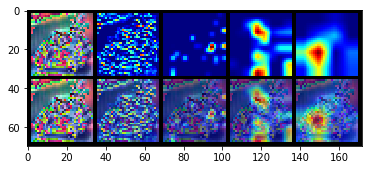

In [28]:
import PIL
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms

trans = transforms.ToPILImage()
pil_img = trans(torchvision.utils.make_grid(images[6]))
torch_img, norm_torch_img = helper.transform_to_device(pil_img)
helper.plot_images(torch_img, norm_torch_img, Net)
print("--------CAR--------")